In [8]:
import torch

from nfmc import sample
from potentials.synthetic.gaussian.diagonal import DiagonalGaussian1, DiagonalGaussian2

torch.manual_seed(0)
target = DiagonalGaussian2(event_shape=(2,))

In [9]:
torch.manual_seed(0)
out_jump_hmc = sample(target, strategy='jump_hmc', warmup=True, param_kwargs={'store_samples': False})
print(float((out_jump_hmc.statistics.running_first_moment - target.mean).abs().max()))
print(float((out_jump_hmc.statistics.running_second_moment - target.second_moment).abs().max()))

Jump MCMC: 100%|██████████| 100/100 [00:06<00:00, 15.82it/s, MCMC acc-rate: 0.77, Jump acc-rate: 0.02, kcalls/s: 349.20, kgrads/s: 329.44, divergences: 0]

0.006420306395739317
0.10590306527839033


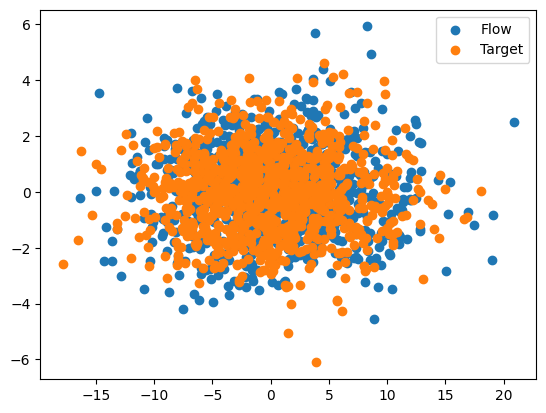

In [10]:
torch.manual_seed(0)
x_flow = out_jump_hmc.kernel.flow.sample(1000).detach()
x_target = target.sample((1000,))
import matplotlib.pyplot as plt

plt.scatter(x_flow[:, 0], x_flow[:, -1], label='Flow')
plt.scatter(x_target[:, 0], x_target[:, -1], label='Target')
plt.legend()
plt.show()

In [11]:
torch.manual_seed(0)
out_hmc = sample(target, strategy='hmc', warmup=True, param_kwargs={'store_samples': False})
print(float((out_hmc.statistics.running_first_moment - target.mean).abs().max()))
print(float((out_hmc.statistics.running_second_moment - target.second_moment).abs().max()))

HMC: 100%|██████████| 100/100 [00:01<00:00, 79.42it/s, acc-rate: 0.89, kcalls/s: 357.33, kgrads/s: 340.32, divergences: 0 | log step: 0.96, leapfrogs: 20, mass norm: 4.01]

0.08189127594232559
0.5429109693311247


In [12]:
torch.manual_seed(0)
out_neutra_hmc = sample(target, strategy='neutra_hmc', warmup=True, param_kwargs={'store_samples': False})
print(float((out_neutra_hmc.statistics.running_first_moment - target.mean).abs().max()))
print(float((out_neutra_hmc.statistics.running_second_moment - target.second_moment).abs().max()))

HMC: 100%|██████████| 100/100 [00:10<00:00,  9.47it/s, acc-rate: 0.81, kcalls/s: 40.34, kgrads/s: 38.42, divergences: 0 | log step: 0.16, leapfrogs: 20, mass norm: 1.02]

0.08166894316673279
0.3065038561083284


In [13]:
torch.manual_seed(0)
out_imh = sample(target, strategy='imh', warmup=True, param_kwargs={'store_samples': False})
print(float((out_imh.statistics.running_first_moment - target.mean).abs().max()))
print(float((out_imh.statistics.running_second_moment - target.second_moment).abs().max()))

Adaptive IMH: 100%|██████████| 100/100 [00:01<00:00, 70.92it/s, acc-rate: 0.88, kcalls/s: 15.04, kgrads/s: 0.00, divergences: 0]

0.01697922684252262
0.21888025991692217
